In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import io
import seaborn as sns

# File Upload

Test env: Google Colab

metadata: https://data.cityofnewyork.us/api/views/jr24-e7cr

Source: https://catalog.data.gov/dataset/electric-consumption-and-cost-2010-april-2020

!! 파일을 TDS # 118번만 남겨서 'cut.csv'로 전처리 해줍니다 !!

그 다음 아래에 파일 선택

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!ls
!pwd
os.listdir()

Saving cut.csv to cut.csv
User uploaded file "cut.csv" with length 24499 bytes
cut.csv  sample_data
/content


['.config', 'cut.csv', 'sample_data']

# 데이터세트

In [ ]:
# csv_path = io.StringIO(uploaded['cut.csv'].decode('utf-8'))
filename = next(iter(test_file))
# df = pd.read_csv(csv_path, index_col = 'Revenue Month', parse_dates = True, error_bad_lines=False, sep='\t')
df = pd.read_csv(filename, index_col = 'Revenue Month', parse_dates = True, error_bad_lines=False, sep='\t')
df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
Revenue Month,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842038,12/24/2009,01/26/2010,33,7518362,N,11414.03,GOV/NYC/068,Yes,92800,5323.01,164,2132.00,3959.02
2010-02-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844206,01/26/2010,02/25/2010,30,7518362,N,10948.54,GOV/NYC/068,Yes,84400,4841.18,172,2236.00,3871.36
2010-03-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841379,02/25/2010,03/26/2010,29,7518362,N,10457.15,GOV/NYC/068,Yes,74400,4267.58,168,2184.00,4005.57
2010-04-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847150,03/26/2010,04/26/2010,31,7518362,N,10277.70,GOV/NYC/068,Yes,74000,4244.64,144,1872.00,4161.06
2010-05-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848673,04/26/2010,05/24/2010,28,7518362,N,10481.32,GOV/NYC/068,Yes,70000,4015.20,172,2236.00,4230.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9488630,09/22/2020,10/22/2020,30,9985100,N,9942.85,GOV/NYC/068,Yes,75200,2532.74,156,1558.44,5851.67
2020-11-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9576724,10/22/2020,11/20/2020,29,9985100,N,9395.38,GOV/NYC/068,Yes,74400,2505.79,160,1598.40,5291.19
2020-12-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9659559,11/20/2020,12/23/2020,33,9985100,N,11473.03,GOV/NYC/068,Yes,87600,2950.37,156,1558.44,6964.22


In [ ]:
# df['Revenue Month']

# 특성 파악

In [ ]:
most_TDS_df = df.loc[df['TDS #'] == 118]

tmp_df = most_TDS_df

# date_time = pd.to_datetime(tmp_df.pop('Revenue Month'), format='%Y-%m-%d')

# plot_cols = ['Consumption (KWH)']
# plot_features = most_TDS_df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

# date_time = pd.to_datetime(df.pop('Revenue Month'), format='%Y-%m')
# plot_features = df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

In [ ]:
charges = df[['Consumption (KWH)']]
# pd.DatetimeIndex()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(charges)

In [ ]:
# for debug
charges

,Consumption (KWH)
Revenue Month,
2010-01-01,92800
2010-02-01,84400
2010-03-01,74400
2010-04-01,74000
2010-05-01,70000
...,...
2020-10-01,75200
2020-11-01,74400
2020-12-01,87600


# 결측치 처리

In [ ]:
month_idx = pd.month_range('2010-01', periods=120)

# 훈련, 테스트 데이터 생성

In [ ]:
TEST_SIZE = 50
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [ ]:
# train_data

In [ ]:
# test_data

In [ ]:
# X_train.shape

NameError: ignored

In [ ]:
# y_train

In [ ]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 10)

# LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model.add(Dense(1))

In [ ]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', run_eagerly=True)
model.fit(X_train, y_train, epochs = 1000, batch_size = 16)

Epoch 1/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1309
Epoch 2/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1018
Epoch 3/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0797
Epoch 4/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0616
Epoch 5/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0514
Epoch 6/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0450
Epoch 7/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0445
Epoch 8/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0442
Epoch 9/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0448
Epoch 10/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0445
Epoch 11/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0438
Epoch 12/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0433
Epoch 13/1000
4/4 [==================

In [ ]:
# test_data

In [ ]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model.predict(X_test)

[[[0.13953488]
  [0.41860465]
  [0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]]

 [[0.41860465]
  [0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]]

 [[0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]]

 [[0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]]

 [[0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]
  [0.33488372]]

 [[0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]
  [0.33488372]
  [0.81860465]]

 [[0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605

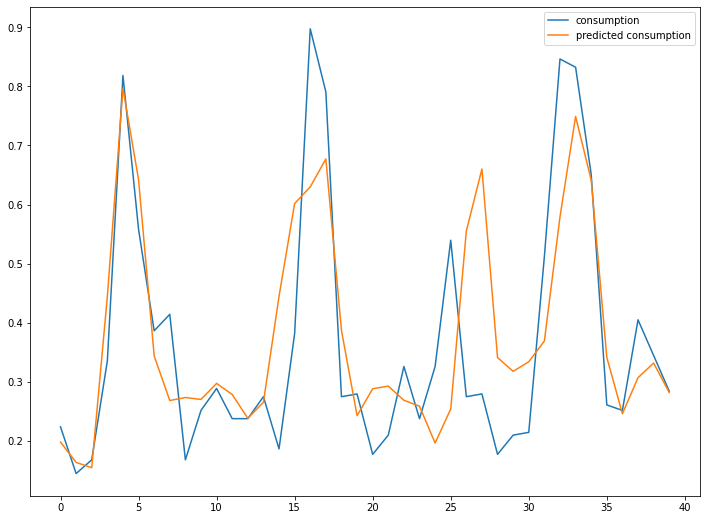

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()

# SimpleRNN

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model2.add(Dense(1))

In [ ]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model2.compile(optimizer = 'adam', loss = 'mean_squared_error', run_eagerly=True)
model2.fit(X_train, y_train, epochs = 1000, batch_size = 16)

Epoch 1/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.4278
Epoch 2/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1950
Epoch 3/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0841
Epoch 4/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0528
Epoch 5/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0570
Epoch 6/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0675
Epoch 7/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0656
Epoch 8/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0572
Epoch 9/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0498
Epoch 10/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0472
Epoch 11/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0459
Epoch 12/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0455
Epoch 13/1000
4/4 [==================

In [ ]:
# test_data

In [ ]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model2.predict(X_test)

[[[0.13953488]
  [0.41860465]
  [0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]]

 [[0.41860465]
  [0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]]

 [[0.79069767]
  [0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]]

 [[0.78604651]
  [0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]]

 [[0.62325581]
  [0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]
  [0.33488372]]

 [[0.46976744]
  [0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605]
  [0.16744186]
  [0.33488372]
  [0.81860465]]

 [[0.        ]
  [0.25116279]
  [0.33023256]
  [0.24651163]
  [0.22325581]
  [0.14418605

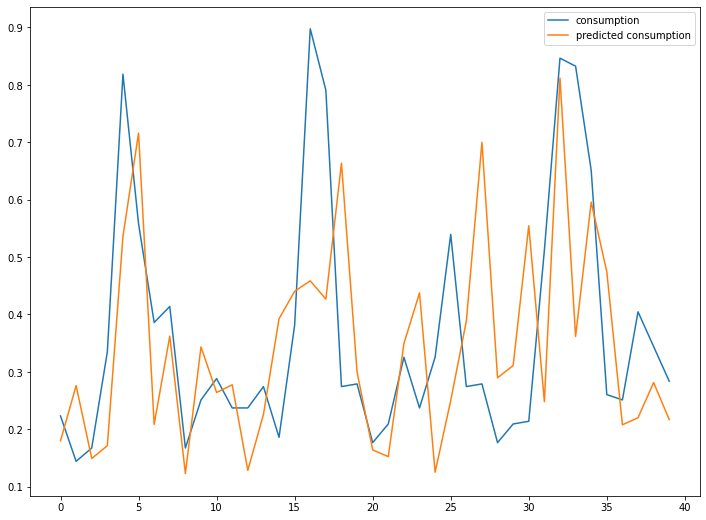

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()